In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
get_ipython().run_line_magic('matplotlib', 'inline')


In [30]:
# read in the data
tweet_data=pd.read_csv('R_CRIME_API.csv')

In [31]:
##column names
column_names = tweet_data.columns

In [32]:
## Using only text column for analysis
tweet_data = tweet_data[['text']]

In [33]:
## Data Cleaning
## Remove Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text) #removes numbers from text
    return text

In [34]:
## cleaning the text
tweet_data['clean text']=tweet_data['text'].apply(lambda x: remove_punct(x))

In [35]:
## Tokenization
def tokenization(text):
    text = re.split('\W+', text) #splitting each sentence/ tweet into its individual words
    return text


tweet_data['Tweet_tokenized'] = tweet_data['clean text'].apply(lambda x: tokenization(x.lower()))

In [36]:
##removing stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text
    
tweet_data['Tweet_without_stop'] = tweet_data['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chaitanyashekar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
##Stemming
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweet_data['Tweet_stemmed'] = tweet_data['Tweet_without_stop'].apply(lambda x: stemming(x))

In [38]:
## Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wordnet.lemmatize(word) for word in text]
    return text

tweet_data['Tweet_lemmatized'] = tweet_data['Tweet_without_stop'].apply(lambda x: lemmatizer(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chaitanyashekar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/chaitanyashekar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [39]:
#Count Vectorizer
from random import sample
clean_tweets=list(set(tweet_data['clean text']))
sample=sample(clean_tweets,20)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample)
names = vectorizer.get_feature_names()
count_vect_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())


/Users/chaitanyashekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
##exporting the cleaned data to a csv file
tweet_data.to_csv('cleaned_twitter_data_py.csv')

In [41]:


#Data Visualization
all_clean_words=[]

for i in tweet_data['Tweet_lemmatized']:
    for j in i:
        all_clean_words.append(j)

all_clean_words=list(set(all_clean_words)) #removes duplicate values from the list

clean_words_str=' '.join(all_clean_words)

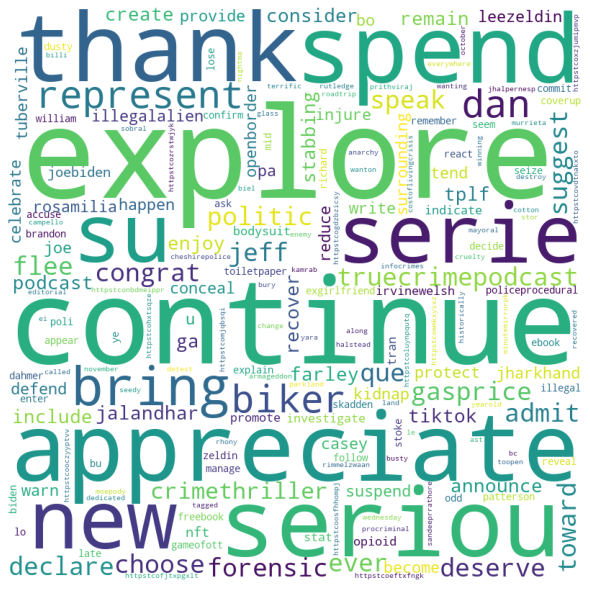

In [42]:
##visualizing the cleaned data
##WordCloud

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(clean_words_str)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()